In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

from  keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
from keras import layers

# Set random seed
np.random.seed(0)

C:\Users\kdabhadk\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [3]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5

In [4]:
from getdata_01 import *
rate_data = get_data()

In [5]:
rate_data.head()

,Rate
Day,
2018-01-23,63.7601
2018-01-24,63.5864
2018-01-25,63.5764
2018-01-26,63.6022
2018-01-27,63.6022


In [6]:
rate_data.tail()

,Rate
Day,
2018-07-17,68.3624
2018-07-18,68.6250
2018-07-19,68.9453
2018-07-20,68.7450
2018-07-21,68.7470


In [7]:
rate_data.describe()

,Rate
count,180.000000
mean,66.293495
std,1.646591
min,63.576400
25%,64.920650
50%,66.312150
75%,67.842650
max,68.991000


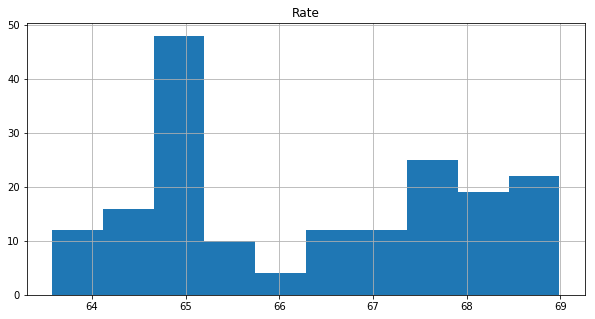

In [8]:
rate_data.hist()
plt.show()

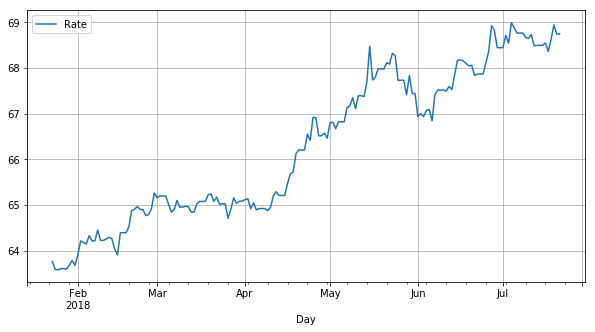

In [9]:
plt.rcParams["figure.figsize"] = fig_size
rate_data.plot()
plt.grid()

## Stationarity analysis

Determine stationarity <br>
Dickey-Fuller test for stationarity

In [10]:
df_test = adfuller(rate_data['Rate'], autolag='AIC')
result = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    result['Critical Value (%s)'%key] = value
print (result)

Test Statistic                  -0.860450
p-value                          0.800718
#Lags Used                       1.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


### Introducing stationarity

### 1. Difference between data and moving average

Plot rolling mean (Moving Average)

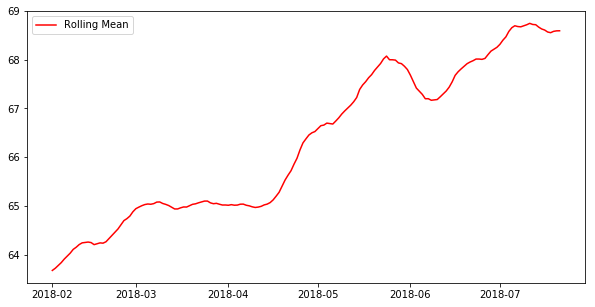

In [11]:
rolling_mean = pd.Series.rolling(rate_data['Rate'],window=10,center=False).mean()
plt.rcParams["figure.figsize"] = fig_size
#rate_data.plot()
rmean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.show()

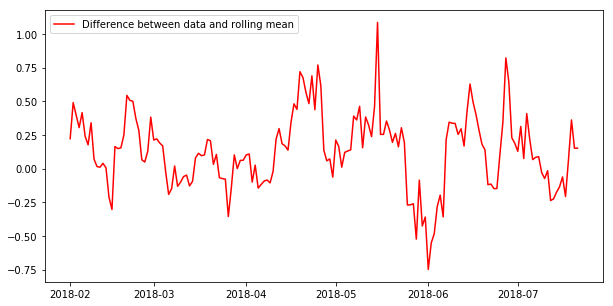

In [12]:
rolling_mean_diff=rate_data['Rate']-rolling_mean
#plt.rcParams["figure.figsize"] = fig_size
plt.plot(rolling_mean_diff, color='red',label='Difference between data and rolling mean')
plt.legend(loc='best')
plt.show()
rolling_mean_diff.dropna(inplace=True)

In [13]:
df_rmean_diff = adfuller(rolling_mean_diff, autolag='AIC')
result_rmean_diff = pd.Series(df_rmean_diff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_rmean_diff[4].items():
    result_rmean_diff['Critical Value (%s)'%key] = value
print (result_rmean_diff)

Test Statistic                  -4.773441
p-value                          0.000061
#Lags Used                       0.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


In [14]:
### 2. Moving average of log(data)

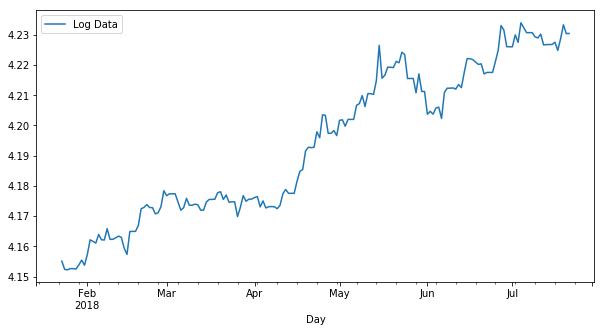

In [15]:
rate_data_log=np.log(rate_data['Rate'])
plt.rcParams["figure.figsize"] = fig_size
rate_data_log.plot(label='Log Data')
plt.legend(loc='best')
plt.show()

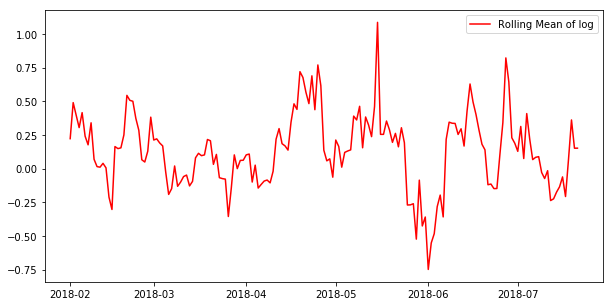

In [16]:
log_rolling_mean=pd.Series.rolling(rate_data_log,window=10,center=False).mean()
plt.rcParams["figure.figsize"] = fig_size
log_rolmean_diff=rate_data_log-log_rolling_mean
log_rmean_diff= plt.plot(rolling_mean_diff, color='red', label='Rolling Mean of log')
plt.legend(loc='best')
plt.show()
log_rolmean_diff.dropna(inplace=True)

In [17]:
df_test_log = adfuller(log_rolmean_diff, autolag='AIC')
result_log = pd.Series(df_test_log[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_log[4].items():
    result_log['Critical Value (%s)'%key] = value
print (result_log)

Test Statistic                  -4.753637
p-value                          0.000067
#Lags Used                       0.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


In [18]:
### 3. Exponentially Weighted Moving Average of Log

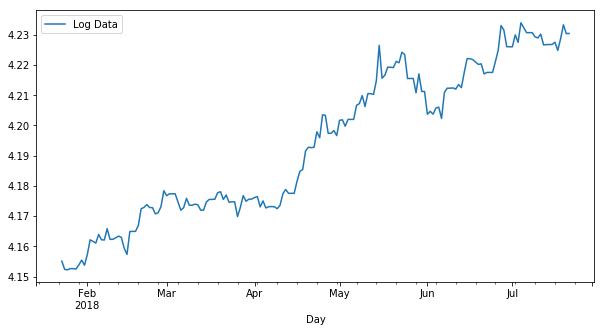

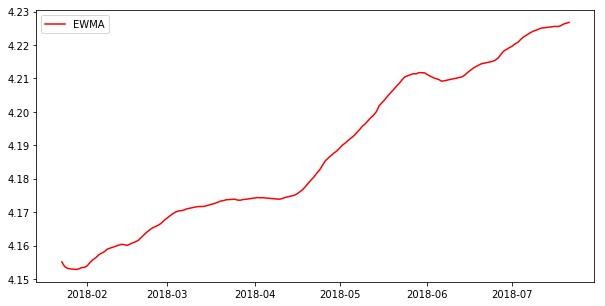

In [19]:
ewma_data=pd.Series.ewm(rate_data_log,halflife=10,min_periods=0,adjust=True,ignore_na=False).mean()
plt.rcParams["figure.figsize"] = fig_size
rate_data_log.plot(label='Log Data')
plt.legend(loc='best')
plt.show()
plt.plot(ewma_data, color='red',label='EWMA')
plt.legend()
plt.legend(loc='best')
plt.show()

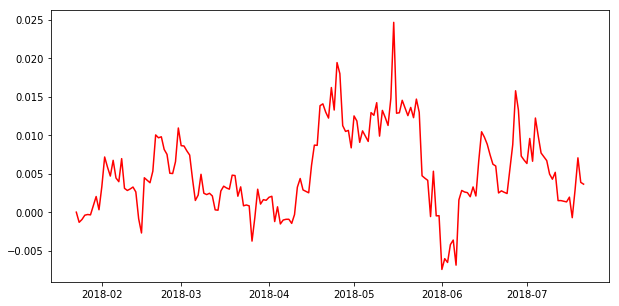

In [20]:
ewma_diff=rate_data_log-ewma_data
plt.rcParams["figure.figsize"] = fig_size
plt.plot(ewma_diff, color='red')

In [21]:
df_test_ewma = adfuller(ewma_diff, autolag='AIC')
result_ewma = pd.Series(df_test_ewma[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_ewma[4].items():
    result_ewma['Critical Value (%s)'%key] = value
print (result_ewma)

Test Statistic                  -3.205201
p-value                          0.019686
#Lags Used                       1.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


In [22]:
### 4. First order differencing

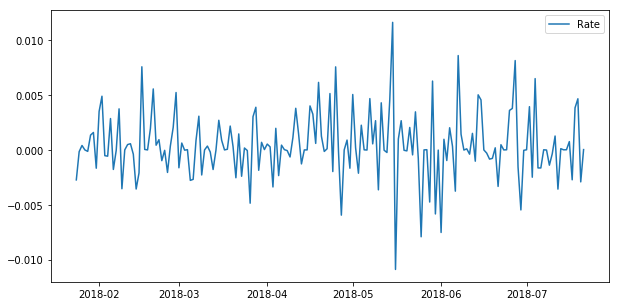

In [23]:
rate_log_diff = rate_data_log - rate_data_log.shift()
rate_log_diff.dropna(inplace=True)
plt.rcParams["figure.figsize"] = fig_size
plt.plot(rate_log_diff)
plt.legend('Log Data')
plt.legend(loc='best')
plt.show()

In [24]:
df_test_logdiff = adfuller(rate_log_diff, autolag='AIC')
result_logdiff = pd.Series(df_test_logdiff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_logdiff[4].items():
    result_logdiff['Critical Value (%s)'%key] = value
print (result_logdiff)

Test Statistic                -1.572969e+01
p-value                        1.293925e-28
#Lags Used                     0.000000e+00
Number of Observations Used    1.780000e+02
Critical Value (1%)           -3.467632e+00
Critical Value (5%)           -2.877918e+00
Critical Value (10%)          -2.575501e+00
dtype: float64


In [25]:
### 5. Decomposition (Trend+Seasonal+Residual)

In [26]:
rate_data_log=np.log(rate_data['Rate'])
decomposition = seasonal_decompose(rate_data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

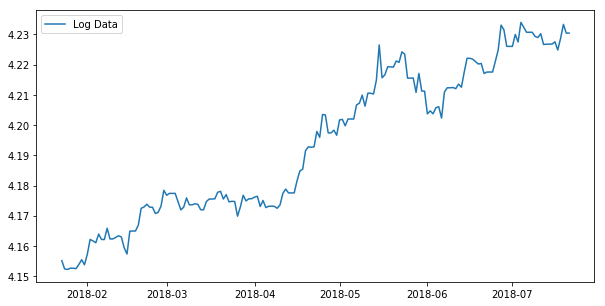

In [27]:
plt.rcParams["figure.figsize"] = fig_size
plt.plot(rate_data_log,label='Log Data')
plt.legend()
plt.show()

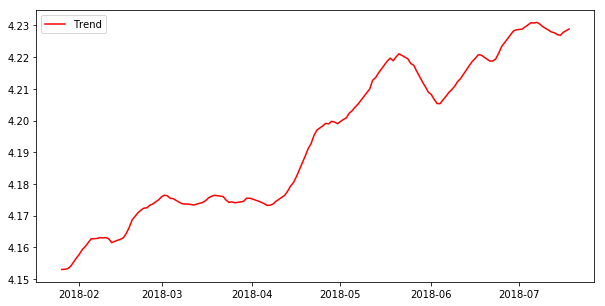

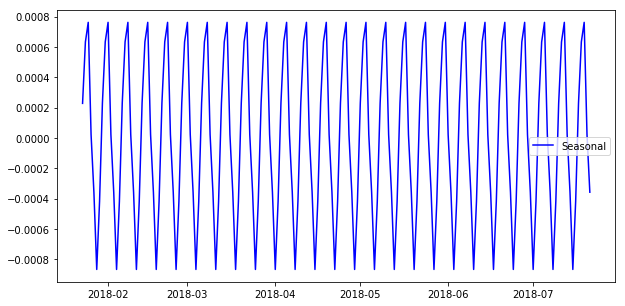

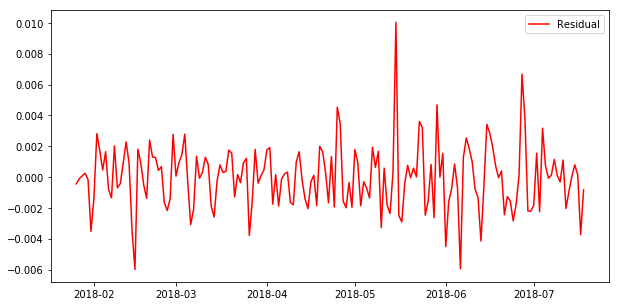

In [28]:
plt.plot(trend,color='red',label='Trend')
plt.legend()
plt.show()

plt.plot(seasonal,color='Blue',label='Seasonal')
plt.legend()
plt.show()

plt.plot(resid,color='red',label='Residual')
plt.legend()
plt.show()

In [29]:
resid.dropna(inplace=True)

df_test_resid = adfuller(resid, autolag='AIC')
result_resid = pd.Series(df_test_resid[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_resid[4].items():
    result_resid['Critical Value (%s)'%key] = value
print (result_resid)

Test Statistic                -8.163240e+00
p-value                        9.025077e-13
#Lags Used                     5.000000e+00
Number of Observations Used    1.680000e+02
Critical Value (1%)           -3.469886e+00
Critical Value (5%)           -2.878903e+00
Critical Value (10%)          -2.576027e+00
dtype: float64


In [30]:
compare=pd.DataFrame({'Test Statistic':[result_rmean_diff.iloc[0],result_log.iloc[0],result_ewma.iloc[0],result_logdiff.iloc[0],result_resid.iloc[0]],
                      'p-value':[result_rmean_diff.iloc[1],result_log.iloc[1],result_ewma.iloc[1],result_logdiff.iloc[1],result_resid.iloc[1]]})
Methods=['Data Rolling mean','Log Data Rolling Mean','Log EWMA','First Order Differencing','Seasonal Decomposition']
compare['Methods']=Methods
compare=compare.set_index('Methods')
compare

,Test Statistic,p-value
Methods,,
Data Rolling mean,-4.773441,6.111863e-05
Log Data Rolling Mean,-4.753637,6.665167e-05
Log EWMA,-3.205201,1.968559e-02
First Order Differencing,-15.729689,1.293925e-28
Seasonal Decomposition,-8.163240,9.025077e-13


Evidently, first order differencing gives the best smoothing to the data. It is very commonly used for making time series stationary because it seldom fails. However, we explored a few other smoothing techniques only to be sure.
Another advantage of first order differencing is that 'statsmodels.arima_models' has accounted for first order differencing.

### Determine time lags

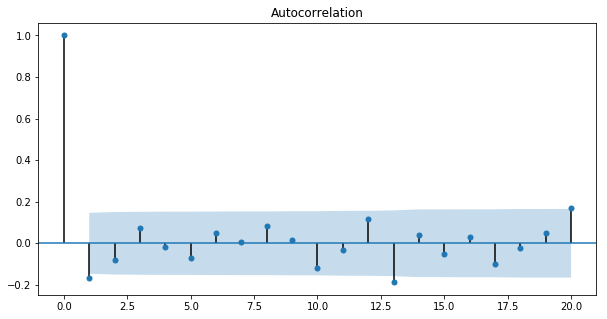

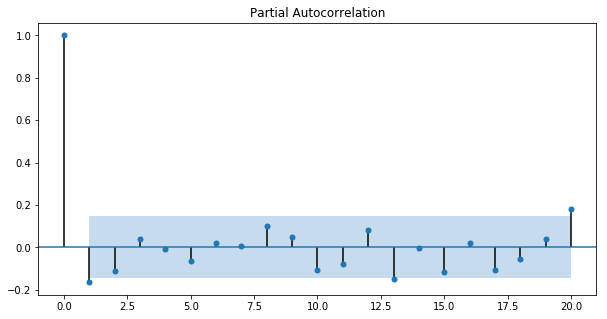

In [31]:
plot_acf(rate_log_diff,lags=20)
plt.show()

plot_pacf(rate_log_diff,lags=20)
plt.show()

## Forecast

In [32]:
# Error metric: Mean Squared error

def MSE(true_data,predictions):
    '''
    Input: 1. (list) True data
            2. (list) Predictions
            
    Returns: (float) Mean squared error
    '''
    
    if (len(true_data) == len(predictions)):
        mse = 0
        for i,element in enumerate(true_data):
            mse += (true_data[i]-predictions[i])**2
        return mse/len(true_data)
    
    else:
        raise Exception('Sizes of lists should match!')

#### 1 day ahead forecast

In [33]:
data1 = rate_data_log.values
train = list(data1[0:125])
test = list(data1[125:])
otest = list(rate_data_log.values[125:0])

train_list = [x for x in train]
predictions = []

for t in range(len(test)):
    model = ARIMA(np.array(train),order=(1,1,0))
    fit = model.fit()
    forecast = float(fit.forecast()[0])
    predictions.append(forecast)
    train.append(float(test[t]))

In [34]:
model = ARIMA(np.array(train),order=(1,1,0))
fit = model.fit()
full_predictions=list(fit.forecast(34)[0])

Mean squared error: 0.047629


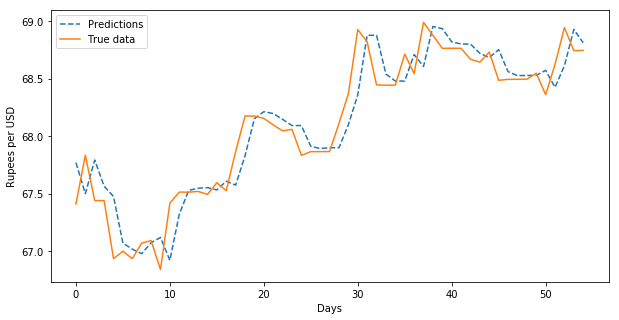

In [35]:
plt.plot(np.exp(predictions),'--',label='Predictions')
plt.plot(np.exp(test),label='True data')
#plt.plot(np.exp(full_predictions),label='Full prediction')
plt.ylabel('Rupees per USD')
plt.xlabel('Days')
plt.legend()
plt.plot()

print ('Mean squared error: {0:3f}'.format(MSE(np.exp(test),np.exp(predictions))))

In [36]:
## Value of currency tomorrow will be:

#Tomorrow's value
data1 = rate_data_log.values
train = list(data1)

train_list = [x for x in train]
predictions = []

model = ARIMA(np.array(train),order=(1,1,0))
fit = model.fit()
forecast = float(fit.forecast()[0])

tomorrow_value = np.exp(forecast)

# Today's value

rate_data_log = rate_data_log[:-1]
data1 = rate_data_log.values
train = list(data1)

train_list = [x for x in train]
predictions = []

model = ARIMA(np.array(train),order=(1,1,0))
fit = model.fit()
forecast = float(fit.forecast()[0])
today_value = np.exp(forecast)

In [37]:
rate_data.tail()

,Rate
Day,
2018-07-17,68.3624
2018-07-18,68.6250
2018-07-19,68.9453
2018-07-20,68.7450
2018-07-21,68.7470


In [38]:
print ("Today's actual value is {0:3f} and model predicted {1:3f}.".format(rate_data.values[-1][0],today_value))
print ("Model predicts value will be {0:3f} tomorrow.".format(tomorrow_value))

Today's actual value is 68.747000 and model predicted 68.812946.
Model predicts value will be 68.780616 tomorrow.


#### Predicting for all 55 days in advance

C:\Users\kdabhadk\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\kdabhadk\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Mean squared error: 2.366476


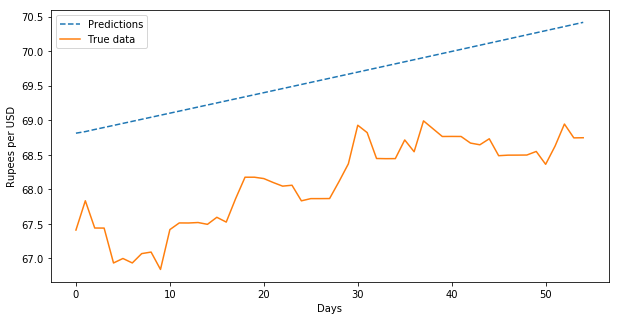

In [39]:
train_list = [x for x in train]
predictions = []

for t in range(len(test)):
    model = ARIMA(np.array(train),order=(1,1,0))
    fit = model.fit()
    forecast = float(fit.forecast()[0])
    predictions.append(forecast)
    train.append(float(forecast))

plt.plot(np.exp(predictions),'--',label='Predictions')
plt.plot(np.exp(test),label='True data')
#plt.plot(np.exp(full_predictions),label='Full prediction')
plt.ylabel('Rupees per USD')
plt.xlabel('Days')
plt.legend()
plt.plot()

print ('Mean squared error: {0:3f}'.format(MSE(np.exp(test),np.exp(predictions))))

Since, ARIMA is a linear model, forecasting using ARIMA for anywhere more than 1 day fails miserably.
The model continue the upward increasing trend.

Let's try to see how a simple LSTM Recurrent Neural Network (RNN) performs with this time series data.

### RNN
Code template is adopted from https://github.com/neelabhpant/Deep-Learning-in-Python/blob/master/Time%20Series%20Prediction.ipynb <br>
The RNN is adjusted to suit as per requirement.

In [40]:
data1 = rate_data_log.values
train = list(data1[0:125])
test = list(data1[125:])

In [41]:
def gen_XY(t_list,size):
    X = np.zeros([1,size])
    Y = []
    temp_list=[]
    for i in range(len(t_list)-size):
        add_list = t_list[i:i+size]
        target = t_list[i+size]
        X = np.append(X,np.array([add_list]),axis=0)
        Y.append(target)
        
    X = np.delete(X,0,axis=0)
    Y = np.array(Y)
    
    return X,Y.T       

In [42]:
X_train,y_train = gen_XY(train,10)
X_test,y_test = gen_XY(test,10)

In [43]:
haha

NameError: name 'haha' is not defined

In [45]:
K.clear_session()
model = Sequential()
# model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
# model.add(layers.Embedding(input_dim=5, output_dim=10))
model.add(layers.LSTM(5, input_shape=(1, 10),kernel_initializer='random_uniform',bias_initializer='zeros'))
model.add(Dense(10, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=Adam(lr=1), loss='mean_squared_error')

In [46]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
model.fit(trainX, y_train, batch_size=1, epochs=100, verbose=2)

Epoch 1/100
 - 1s - loss: 10.1685
Epoch 2/100
 - 0s - loss: 10.1399
Epoch 3/100
 - 0s - loss: 10.1399
Epoch 4/100
 - 0s - loss: 10.1399
Epoch 5/100
 - 0s - loss: 10.1399
Epoch 6/100
 - 0s - loss: 10.1399
Epoch 7/100
 - 0s - loss: 10.1399
Epoch 8/100
 - 0s - loss: 10.1399
Epoch 9/100
 - 0s - loss: 10.1399
Epoch 10/100
 - 0s - loss: 10.1399
Epoch 11/100
 - 0s - loss: 10.1399
Epoch 12/100
 - 0s - loss: 10.1399
Epoch 13/100
 - 0s - loss: 10.1399
Epoch 14/100
 - 0s - loss: 10.1399
Epoch 15/100
 - 0s - loss: 10.1399
Epoch 16/100
 - 0s - loss: 10.1399
Epoch 17/100
 - 0s - loss: 10.1399
Epoch 18/100
 - 0s - loss: 10.1399
Epoch 19/100
 - 0s - loss: 10.1399
Epoch 20/100
 - 0s - loss: 10.1399
Epoch 21/100
 - 0s - loss: 10.1399
Epoch 22/100
 - 0s - loss: 10.1399
Epoch 23/100
 - 0s - loss: 10.1399
Epoch 24/100
 - 0s - loss: 10.1399
Epoch 25/100
 - 0s - loss: 10.1399
Epoch 26/100
 - 0s - loss: 10.1399
Epoch 27/100
 - 0s - loss: 10.1399
Epoch 28/100
 - 0s - loss: 10.1399
Epoch 29/100
 - 0s - loss: 10

In [ ]:
y_pred  =  model.predict(testX)
plt.plot(np.exp(y_pred),'--',label='Model-predicted')
plt.plot(np.exp(y_test),label='Actual rate')
plt.legend()
plt.show()
print('MSE: %f'%(MSE(np.exp(y_test), np.exp(y_pred))))

In [ ]:
y_pred

In [ ]:
unseen_pred = []
n = 10
Xtr = np.matrix.copy(X_train)
for i in range(n):
    pred = model.predict(Xtr[-1])
    Xtr = np.append(Xtr[-1,1:],np.matrix([[pred[0,0]]]),axis=1)
    unseen_pred.append(pred[0,0])

In [ ]:
y_pred  =  model.predict(X_test)
plt.plot(np.exp(unseen_pred),'--',label='Model-predicted')
plt.plot(np.exp(y_test[0:n]),label='Actual rate')
plt.legend()
plt.show()
print('MSE: %f'%(MSE(np.exp(y_test[0:n]), np.exp(unseen_pred))))